In [27]:
import pandas as pd
import numpy as np

In [28]:
df = pd.read_json('/kaggle/input/fbi-crimedata-2016/FBI_CrimeData_2016.json')

# Display the DataFrame
df.head()

,Region,State,City,Population,Murder,Rape,Robbery,Assault,Burglary,Theft,Vehicle_Theft
0,South,ALABAMA,Abbeville,2608,0,1,0,10,12,34,5
1,South,ALABAMA,Adamsville,4377,0,0,10,9,33,201,16
2,South,ALABAMA,Addison,738,0,0,0,1,1,11,2
3,South,ALABAMA,Alabaster,33040,1,2,2,92,58,411,19
4,South,ALABAMA,Albertville,21525,0,5,10,14,190,462,69


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9579 entries, 0 to 9578
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Region         9579 non-null   object
 1   State          9579 non-null   object
 2   City           9579 non-null   object
 3   Population     9579 non-null   object
 4   Murder         9579 non-null   int64 
 5   Rape           9579 non-null   int64 
 6   Robbery        9579 non-null   int64 
 7   Assault        9579 non-null   int64 
 8   Burglary       9579 non-null   int64 
 9   Theft          9579 non-null   int64 
 10  Vehicle_Theft  9579 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 823.3+ KB


In [30]:
def frequency_table(variable):
    
    percentage_of_nan_systemic = ( len(variable) - len(variable.dropna()) ) / len(variable) * 100
#     percentage_of_nan = 123
    # Get unique elements and their counts
    VARIABLE = variable.dropna()
    unique_elements, counts = np.unique(VARIABLE, return_counts=True)

    # Calculate percentages
    percentages = (counts / len(variable)) * 100

    # Create a dictionary to store the value counts and percentages
    value_counts_and_percentages = zip( unique_elements , counts , percentages  )

    # Print the value counts and percentages
    for i, j, k in value_counts_and_percentages:
        print( f"{i}: Count: {j}, Percentage: {k:.2f}%"  )
    print("percentage_of_nan_systemic : ", percentage_of_nan_systemic,"%"  )
    return



### categorical_variables = ["Region","State","City"]
categorical_variables = ["Region","State"]

for var in categorical_variables :
    frequency_table(df[var])
    print("#"*90)

Midwest: Count: 2829, Percentage: 29.53%
Northeast: Count: 2403, Percentage: 25.09%
South: Count: 3038, Percentage: 31.72%
West: Count: 1309, Percentage: 13.67%
percentage_of_nan_systemic :  0.0 %
##########################################################################################
ALABAMA: Count: 201, Percentage: 2.10%
ALASKA: Count: 27, Percentage: 0.28%
ARIZONA: Count: 60, Percentage: 0.63%
ARKANSAS: Count: 194, Percentage: 2.03%
CALIFORNIA: Count: 461, Percentage: 4.81%
COLORADO: Count: 129, Percentage: 1.35%
CONNECTICUT: Count: 90, Percentage: 0.94%
DELAWARE: Count: 36, Percentage: 0.38%
DISTRICT OF COLUMBIA: Count: 1, Percentage: 0.01%
FLORIDA: Count: 284, Percentage: 2.96%
GEORGIA: Count: 286, Percentage: 2.99%
HAWAII: Count: 1, Percentage: 0.01%
IDAHO: Count: 63, Percentage: 0.66%
ILLINOIS: Count: 532, Percentage: 5.55%
INDIANA: Count: 98, Percentage: 1.02%
IOWA: Count: 124, Percentage: 1.29%
KANSAS: Count: 132, Percentage: 1.38%
KENTUCKY: Count: 233, Percentage: 2.43%
LOU

Steilacoom: Count: 1, Percentage: 0.01%
Stephens City: Count: 1, Percentage: 0.01%
Stephenville: Count: 1, Percentage: 0.01%
Sterling: Count: 4, Percentage: 0.04%
Sterling Heights: Count: 1, Percentage: 0.01%
Steubenville: Count: 1, Percentage: 0.01%
Stevens Point: Count: 1, Percentage: 0.01%
Stevensville: Count: 1, Percentage: 0.01%
Stewartsville: Count: 1, Percentage: 0.01%
Stickney: Count: 1, Percentage: 0.01%
Stigler: Count: 1, Percentage: 0.01%
Stillwater: Count: 2, Percentage: 0.02%
Stillwater Town: Count: 1, Percentage: 0.01%
Stilwell: Count: 1, Percentage: 0.01%
Stockbridge: Count: 2, Percentage: 0.02%
Stockertown: Count: 1, Percentage: 0.01%
Stockport Town: Count: 1, Percentage: 0.01%
Stockton: Count: 3, Percentage: 0.03%
Stone Harbor: Count: 1, Percentage: 0.01%
Stone Mountain: Count: 1, Percentage: 0.01%
Stoneboro: Count: 1, Percentage: 0.01%
Stoneham: Count: 1, Percentage: 0.01%
Stonewall: Count: 1, Percentage: 0.01%
Stonington: Count: 1, Percentage: 0.01%
Stony Point Town:

In [31]:
df_copy = df.copy()
df_copy["violent crimes"] = df_copy["Murder"] + df_copy["Rape"] + df_copy["Robbery"] + df_copy["Assault"]
df_copy["non-violent crimes"] = df_copy["Burglary"] + df_copy["Theft"] + df_copy["Vehicle_Theft"]
df_copy = df_copy.drop(["Murder","Rape","Robbery","Assault","Burglary","Theft","Vehicle_Theft"], axis =1)
df_copy.head()

,Region,State,City,Population,violent crimes,non-violent crimes
0,South,ALABAMA,Abbeville,2608,11,51
1,South,ALABAMA,Adamsville,4377,19,250
2,South,ALABAMA,Addison,738,1,14
3,South,ALABAMA,Alabaster,33040,97,488
4,South,ALABAMA,Albertville,21525,29,721


In [32]:
df_new = df.copy()
df_new["violent crimes"] = df_new[df_new.columns[4:8]].sum(axis=1) 
df_new["non-violent crimes"]  = df_new[df_new.columns[8:]].sum(axis=1)
df_new = df_new.drop(["Murder","Rape","Robbery","Assault","Burglary","Theft","Vehicle_Theft"], axis =1)
df_new.head() 

,Region,State,City,Population,violent crimes,non-violent crimes
0,South,ALABAMA,Abbeville,2608,11,62
1,South,ALABAMA,Adamsville,4377,19,269
2,South,ALABAMA,Addison,738,1,15
3,South,ALABAMA,Alabaster,33040,97,585
4,South,ALABAMA,Albertville,21525,29,750


In [33]:
df_copy.groupby("Region").agg("count") 

,State,City,Population,violent crimes,non-violent crimes
Region,,,,,
Midwest,2829,2829,2829,2829,2829
Northeast,2403,2403,2403,2403,2403
South,3038,3038,3038,3038,3038
West,1309,1309,1309,1309,1309


In [34]:
df.groupby("Region").agg("sum")["Murder"] 

Region
Midwest      3304
Northeast    1674
South        5018
West         2605
Name: Murder, dtype: int64

In [35]:
# df_copy.plot.bar(x=None, y=None, **kwargs)

# 1

In [36]:
###############################################################################################################

In [37]:
murder_by_region = dict()
violent_by_region = dict()
nonviolent_by_region = dict()
 
region_list = ["South","West","Northeast","Midwest"]
crime_list = ['Murder','Rape','Robbery','Assault','Burglary','Theft','Vehicle_Theft']

for rgn in region_list :
    for crm  in crime_list[0:4] :
        
        for  numb in df[df["Region"]==rgn].loc[:,crm] :
            if rgn not in violent_by_region  :
                violent_by_region[rgn] = numb
            else :
                violent_by_region[rgn] += numb
        
        if crm == "Murder" :
            for numb in df[df["Region"]==rgn].loc[:,crm] :
                if rgn not in murder_by_region  :
                    murder_by_region[rgn] = numb 
                else :
                    murder_by_region[rgn] += numb 
            
    for crm  in crime_list[4:] :
        
        for numb in df[df["Region"]==rgn].loc[:,crm] :
            if rgn not in nonviolent_by_region  :
                nonviolent_by_region[rgn] = numb
            else :
                nonviolent_by_region[rgn] += numb
                
print(murder_by_region) 
print( pd.DataFrame({"Incident":murder_by_region.values() , "Region":murder_by_region.keys() }) )
print("#"*90)
print(violent_by_region) 
print( pd.DataFrame({"Incident":violent_by_region.values() , "Region":violent_by_region.keys() }) )
print("#"*90)
print(nonviolent_by_region) 
print( pd.DataFrame({"Incident":nonviolent_by_region.values() , "Region":nonviolent_by_region.keys() }) )
print("#"*90)


crimes=list()
new = list()
number_states = df["State"].unique().shape[0] ### 51
df["violent_crimes"] = df["Murder"] + df["Rape"] + df["Robbery"] + df["Assault"] 
mean_violent_crimes = df["violent_crimes"].sum() / number_states
for state in df["State"].unique() : 
    crimes.append( df[ df["State"]==state ]["violent_crimes"].sum() )

talubar_report = pd.DataFrame( { "STATE":df["State"].unique() ,"CRIMES":crimes , "DISTANCE FROM MEAN" :crimes - mean_violent_crimes } )
talubar_report

{'South': 5018, 'West': 2605, 'Northeast': 1674, 'Midwest': 3304}
   Incident     Region
0      5018      South
1      2605       West
2      1674  Northeast
3      3304    Midwest
##########################################################################################
{'South': 331011, 'West': 259401, 'Northeast': 156891, 'Midwest': 211854}
   Incident     Region
0    331011      South
1    259401       West
2    156891  Northeast
3    211854    Midwest
##########################################################################################
{'South': 2080097, 'West': 1781665, 'Northeast': 760200, 'Midwest': 1226462}
   Incident     Region
0   2080097      South
1   1781665       West
2    760200  Northeast
3   1226462    Midwest
##########################################################################################


,STATE,CRIMES,DISTANCE FROM MEAN
0,ALABAMA,15350,-3457.0
1,ALASKA,4697,-14110.0
2,ARIZONA,23856,5049.0
3,ARKANSAS,12048,-6759.0
4,CALIFORNIA,145205,126398.0
5,COLORADO,15533,-3274.0
6,CONNECTICUT,7754,-11053.0
7,DELAWARE,2359,-16448.0
8,DISTRICT OF COLUMBIA,7711,-11096.0
9,FLORIDA,50540,31733.0


# 2

In [38]:
###############################################################################################################

{'South': 5018, 'West': 2605, 'Northeast': 1674, 'Midwest': 3304}
   Incident     Region
0      5018      South
1      2605       West
2      1674  Northeast
3      3304    Midwest
##########################################################################################
{'South': 331011, 'West': 259401, 'Northeast': 156891, 'Midwest': 211854}
   Incident     Region
0    331011      South
1    259401       West
2    156891  Northeast
3    211854    Midwest
##########################################################################################
{'South': 2080097, 'West': 1781665, 'Northeast': 760200, 'Midwest': 1226462}
   Incident     Region
0   2080097      South
1   1781665       West
2    760200  Northeast
3   1226462    Midwest
##########################################################################################


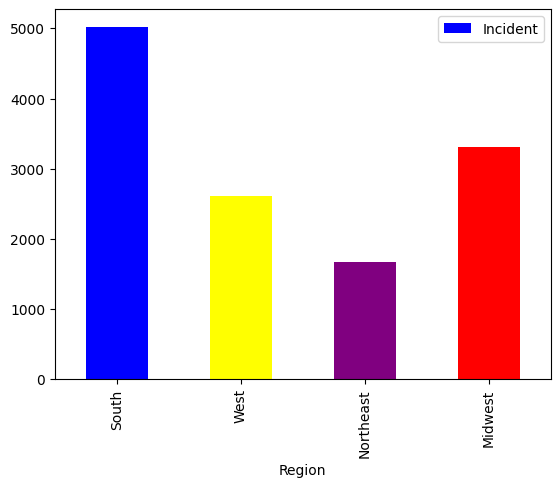

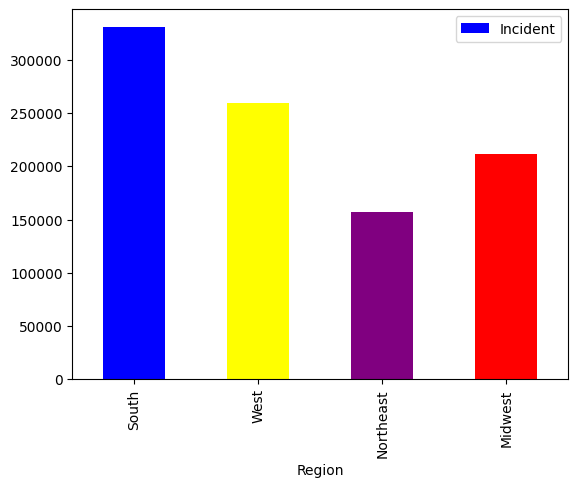

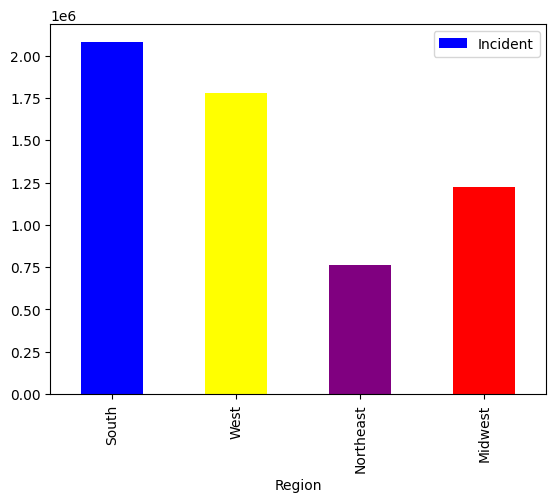

In [39]:
murder_by_region = dict()
violent_by_region = dict()
nonviolent_by_region = dict()
 
region_list = ["South","West","Northeast","Midwest"]
# crime_list = ['Murder','Rape','Robbery','Assault','Burglary','Theft','Vehicle_Theft']
rgn_ctrl = 0
crm_ctrl = 4
flag_1 = 0

while True :
    if rgn_ctrl <= 3 and flag_1 == 0 :
        if  crm_ctrl == 4 :
            murder_by_region[region_list[rgn_ctrl]] = murder_by_region.get(region_list[rgn_ctrl],0) + df[df["Region"]==region_list[rgn_ctrl]].iloc[:,crm_ctrl].sum()
                 
        if crm_ctrl <= 7 :
            violent_by_region[region_list[rgn_ctrl]] = violent_by_region.get(region_list[rgn_ctrl],0) + df[ df["Region"]==region_list[rgn_ctrl] ].iloc[:,crm_ctrl].sum()
       
        if crm_ctrl > 7 and crm_ctrl < 11 :   
            nonviolent_by_region[region_list[rgn_ctrl]] = nonviolent_by_region.get(region_list[rgn_ctrl],0) + df[df["Region"]==region_list[rgn_ctrl]].iloc[:,crm_ctrl].sum()

        if  crm_ctrl >= 11:
            flag_1 = 1
            
    crm_ctrl += 1
    
    if rgn_ctrl > 3 :
        break
        
    if flag_1 == 1 :
        crm_ctrl = 4
        flag_1 = 0
        rgn_ctrl += 1
        

                
print(murder_by_region) 
df_murder_by_region = pd.DataFrame({"Incident":murder_by_region.values() , "Region":murder_by_region.keys() })
print( pd.DataFrame({"Incident":murder_by_region.values() , "Region":murder_by_region.keys() }) )
df_murder_by_region.plot( x="Region",y="Incident",kind="bar",color = ['blue','yellow','purple','red'] )

print("#"*90)

df_violent_by_region = pd.DataFrame({"Incident":violent_by_region.values() , "Region":violent_by_region.keys() })
print(violent_by_region) 
print( pd.DataFrame({"Incident":violent_by_region.values() , "Region":violent_by_region.keys() }) )
df_violent_by_region.plot( x="Region",y="Incident",kind="bar",color = ['blue','yellow','purple','red'] )

print("#"*90)

df_nonviolent_by_region = pd.DataFrame({"Incident":nonviolent_by_region.values() , "Region":nonviolent_by_region.keys() })
print(nonviolent_by_region) 
print( pd.DataFrame({"Incident":nonviolent_by_region.values() , "Region":nonviolent_by_region.keys()}) )
df_nonviolent_by_region.plot( x="Region",y="Incident",kind="bar",color = ['blue','yellow','purple','red'] )

print("#"*90)




In [40]:
crimes=list()
new = list()
number_states = df["State"].unique().shape[0] ### 51
df["violent_crimes"] = df["Murder"] + df["Rape"] + df["Robbery"] + df["Assault"] 
mean_violent_crimes = df["violent_crimes"].sum() / number_states
for state in df["State"].unique() : 
    crimes.append( df[ df["State"]==state ]["violent_crimes"].sum() )
#     new.append( minus )
talubar_report = pd.DataFrame( { "STATE":df["State"].unique() ,"CRIMES":crimes , "DISTANCE FROM MEAN" :crimes - mean_violent_crimes } )
print(talubar_report)

                   STATE  CRIMES  DISTANCE FROM MEAN
0                ALABAMA   15350             -3457.0
1                 ALASKA    4697            -14110.0
2                ARIZONA   23856              5049.0
3               ARKANSAS   12048             -6759.0
4             CALIFORNIA  145205            126398.0
5               COLORADO   15533             -3274.0
6            CONNECTICUT    7754            -11053.0
7               DELAWARE    2359            -16448.0
8   DISTRICT OF COLUMBIA    7711            -11096.0
9                FLORIDA   50540             31733.0
10               GEORGIA   18496              -311.0
11                HAWAII    3331            -15476.0
12                 IDAHO    2676            -16131.0
13              ILLINOIS   50968             32161.0
14               INDIANA   21325              2518.0
15                  IOWA    7533            -11274.0
16                KANSAS    7982            -10825.0
17              KENTUCKY    8342            -1

# 3

In [41]:
###############################################################################################################

{'South': 5018, 'West': 2605, 'Northeast': 1674, 'Midwest': 3304}
##########################################################################################

    Incident     Region
0      5018      South
1      2605       West
2      1674  Northeast
3      3304    Midwest 

##########################################################################################
##########################################################################################


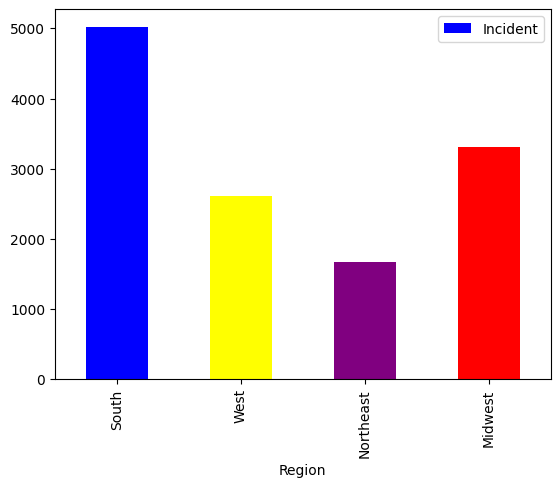

In [42]:
def crime_report ( crime , DF ) :
    ind = 0
    CrRprt = dict()
    Region =   DF["Region"]  
    numb =   DF[crime]  
    for rgn  in Region :
        if rgn not in CrRprt :
            CrRprt[rgn] = 0
#         if rgn in crm_report : 
        CrRprt[rgn] += numb[ind] 
        ind += 1
    return CrRprt

print( crime_report("Murder",df) )

print("#"*90)#######################################################################################################

df_murder_by_region = pd.DataFrame({"Incident":crime_report("Murder",df).values() ,"Region":crime_report("Murder",df).keys() })
print( "\n",df_murder_by_region,"\n" )

print("#"*90)#######################################################################################################

def PLOT ( IN_dictionary ) :
    df_specified = pd.DataFrame({"Incident":IN_dictionary.values() , "Region":IN_dictionary.keys() })    
    return df_specified.plot( x="Region",y="Incident",kind="bar",color = ['blue','yellow','purple','red'] )

PLOT( crime_report( "Murder" , df) ) 

print("#"*90)#######################################################################################################


{'South': 331011, 'West': 259401, 'Northeast': 156891, 'Midwest': 211854}
##########################################################################################

    Incident     Region
0    331011      South
1    259401       West
2    156891  Northeast
3    211854    Midwest 

##########################################################################################
##########################################################################################


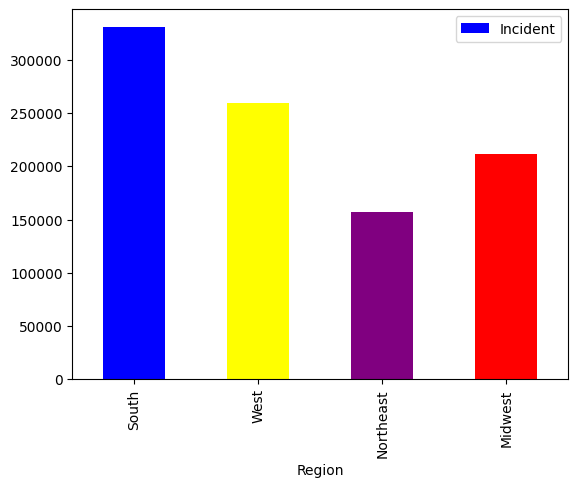

In [43]:
def violent_report ( DF ) :
    ind = 0
    ViRprt = dict()
    Region = DF["Region"] 
    numb = DF["Murder"] + DF["Rape"] + DF["Robbery"] + DF["Assault"]   
    for rgn  in Region :
        if rgn not in ViRprt :
            ViRprt[rgn] = 0
#         if rgn in crm_report : 
        ViRprt[rgn] += numb[ind] 
        ind += 1
    return ViRprt

print( violent_report(df) )

print("#"*90)#######################################################################################################

df_violent_by_region = pd.DataFrame({"Incident":violent_report (df).values() , "Region":violent_report (df).keys() })
print( "\n",df_violent_by_region,"\n" )

print("#"*90)#######################################################################################################

def PLOT ( IN_dictionary ) :
    df_specified = pd.DataFrame({"Incident":IN_dictionary.values() , "Region":IN_dictionary.keys() })    
    return df_specified.plot( x="Region",y="Incident",kind="bar",color = ['blue','yellow','purple','red'] )

PLOT( violent_report(df) ) 

print("#"*90)#######################################################################################################


{'South': 2080097, 'West': 1781665, 'Northeast': 760200, 'Midwest': 1226462}
##########################################################################################

    Incident     Region
0   2080097      South
1   1781665       West
2    760200  Northeast
3   1226462    Midwest 

##########################################################################################
##########################################################################################


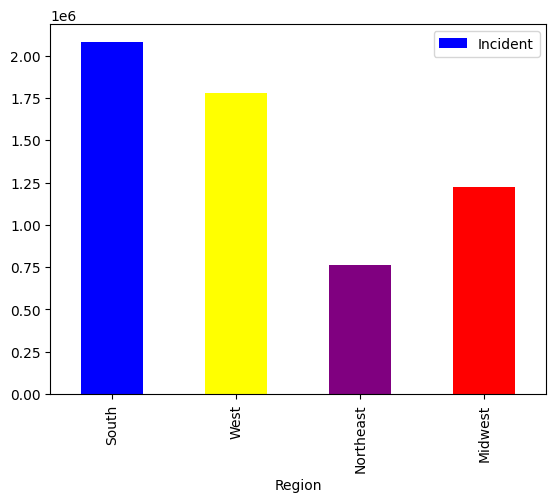

In [44]:
def non_violent_report ( DF ) :
    ind = 0
    nonViRprt = dict()
    Region = DF["Region"] 
    numb = DF['Burglary'] + DF['Theft'] + DF['Vehicle_Theft']   
    for rgn  in Region :
        if rgn not in nonViRprt :
            nonViRprt[rgn] = 0
#         if rgn in crm_report : 
        nonViRprt[rgn] += numb[ind] 
        ind += 1
    return nonViRprt

print( non_violent_report(df) ) 

print("#"*90)#######################################################################################################

df_non_violent_by_region = pd.DataFrame( {"Incident":non_violent_report(df).values(),"Region":non_violent_report(df).keys()} )
print( "\n", df_non_violent_by_region ,"\n" )

print("#"*90)#######################################################################################################

def PLOT ( IN_dictionary ) :
    df_specified = pd.DataFrame( {"Incident":IN_dictionary.values() , "Region":IN_dictionary.keys()} )    
    return df_specified.plot( x="Region",y="Incident",kind="bar",color = ['blue','yellow','purple','red'] )

PLOT( non_violent_report(df) ) 

print("#"*90)#######################################################################################################


In [45]:

def distance_state_from_mean ( DF ) :
    list_violent_crimes = DF["Murder"] + DF["Rape"] + DF["Robbery"] + DF["Assault"]
    list_state = DF["State"]
    total = 0
    state_numb_dict = dict()
    list_difference = list()
    for numb , state in zip(list_violent_crimes,list_state) :
        total += numb
        if state not in state_numb_dict :
            state_numb_dict[state] = 0
        state_numb_dict[state] += numb
    mean_dict = total / len (state_numb_dict.keys())
    for i in state_numb_dict.values() :
        list_difference . append(i - mean_dict) 
    talubar_report = pd.DataFrame({"STATE":state_numb_dict.keys(),"CRIMES":state_numb_dict.values() ,"DISTANCE FROM MEAN":list_difference } )  
    return talubar_report

print( distance_state_from_mean(df) )


####################################################################################################################################################


                   STATE  CRIMES  DISTANCE FROM MEAN
0                ALABAMA   15350             -3457.0
1                 ALASKA    4697            -14110.0
2                ARIZONA   23856              5049.0
3               ARKANSAS   12048             -6759.0
4             CALIFORNIA  145205            126398.0
5               COLORADO   15533             -3274.0
6            CONNECTICUT    7754            -11053.0
7               DELAWARE    2359            -16448.0
8   DISTRICT OF COLUMBIA    7711            -11096.0
9                FLORIDA   50540             31733.0
10               GEORGIA   18496              -311.0
11                HAWAII    3331            -15476.0
12                 IDAHO    2676            -16131.0
13              ILLINOIS   50968             32161.0
14               INDIANA   21325              2518.0
15                  IOWA    7533            -11274.0
16                KANSAS    7982            -10825.0
17              KENTUCKY    8342            -1

In [46]:
def distance_state_from_mean () :
    list_violent_crimes = df["Murder"] + df["Rape"] + df["Robbery"] + df["Assault"]
    list_state = df["State"]
    total = 0
    state_numb_dict = dict()
    for  state,numb in zip(list_state,list_violent_crimes) :
        total += numb
        if state not in state_numb_dict :
            state_numb_dict[state] = 0
        state_numb_dict[state] += numb
    mean_dict = total / len(state_numb_dict)
    minus_column = ( pd.DataFrame(state_numb_dict.values())-mean_dict ) [0]
#     talubar_report = pd.DataFrame({"STATE":list(state_numb_dict.keys()),"CRIMES":list(state_numb_dict.values()) }) #,"DISTANCE_FROM_MEAN":state_numb_dict.values()-mean_dict} ) 
#     talubar_report["DISTANCE_FROM_MEAN"] = minus_colum                              
#     return talubar_report
    return state_numb_dict


print( distance_state_from_mean() )

{'ALABAMA': 15350, 'ALASKA': 4697, 'ARIZONA': 23856, 'ARKANSAS': 12048, 'CALIFORNIA': 145205, 'COLORADO': 15533, 'CONNECTICUT': 7754, 'DELAWARE': 2359, 'DISTRICT OF COLUMBIA': 7711, 'FLORIDA': 50540, 'GEORGIA': 18496, 'HAWAII': 3331, 'IDAHO': 2676, 'ILLINOIS': 50968, 'INDIANA': 21325, 'IOWA': 7533, 'KANSAS': 7982, 'KENTUCKY': 8342, 'LOUISIANA': 16444, 'MAINE': 1254, 'MARYLAND': 14175, 'MASSACHUSETTS': 24155, 'MICHIGAN': 35790, 'MINNESOTA': 11618, 'MISSISSIPPI': 3256, 'MISSOURI': 25175, 'MONTANA': 1952, 'NEBRASKA': 4401, 'NEVADA': 18823, 'NEW HAMPSHIRE': 2413, 'NEW JERSEY': 19098, 'NEW MEXICO': 9480, 'NEW YORK': 66581, 'NORTH CAROLINA': 16846, 'NORTH DAKOTA': 1393, 'OHIO': 28235, 'OKLAHOMA': 15348, 'OREGON': 7785, 'PENNSYLVANIA': 32877, 'RHODE ISLAND': 2423, 'SOUTH CAROLINA': 9473, 'SOUTH DAKOTA': 2169, 'TENNESSEE': 33433, 'TEXAS': 97872, 'UTAH': 5679, 'VERMONT': 336, 'VIRGINIA': 9318, 'WASHINGTON': 16913, 'WEST VIRGINIA': 2701, 'WISCONSIN': 15265, 'WYOMING': 770}


# 4

{'South': 5018, 'West': 2605, 'Northeast': 1674, 'Midwest': 3304}
##########################################################################################
                  incidents                      Region    

0                   5018                         South
1                   2605                         West
2                   1674                         Northeast
3                   3304                         Midwest
##########################################################################################
##########################################################################################


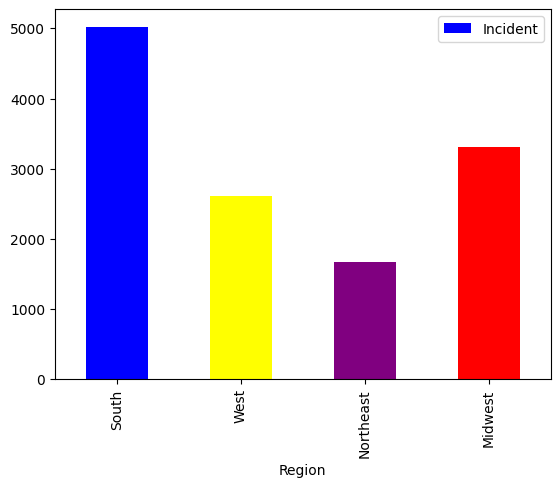

In [47]:
def crime_report ( crime , DF ) :
    ind = 0
    CrRprt = dict()
    Region =   DF["Region"]  
    numb =   DF[crime]  
    for rgn  in Region :
        if rgn not in CrRprt :
            CrRprt[rgn] = 0
#         if rgn in crm_report : 
        CrRprt[rgn] += numb[ind] 
        ind += 1
    return CrRprt

print( crime_report("Murder",df) )

print("#"*90)#######################################################################################################

print("                  incidents                      Region    \n")
for i , j , k in zip( range(0,len(crime_report("Murder",df))) , crime_report("Murder",df).values() , crime_report("Murder",df).keys() ) :
    print( "{0}                   {1}                         {2}".format(i,j,k) )

print("#"*90)#######################################################################################################

def PLOT ( IN_dictionary ) :
    df_specified = pd.DataFrame({"Incident":IN_dictionary.values() , "Region":IN_dictionary.keys() })    
    return df_specified.plot( x="Region",y="Incident",kind="bar",color = ['blue','yellow','purple','red'] )

PLOT( crime_report( "Murder" , df) ) 

print("#"*90)#######################################################################################################

{'South': 331011, 'West': 259401, 'Northeast': 156891, 'Midwest': 211854}
##########################################################################################
                  incidents                       Region    

0                   331011                         South
1                   259401                         West
2                   156891                         Northeast
3                   211854                         Midwest
##########################################################################################
##########################################################################################


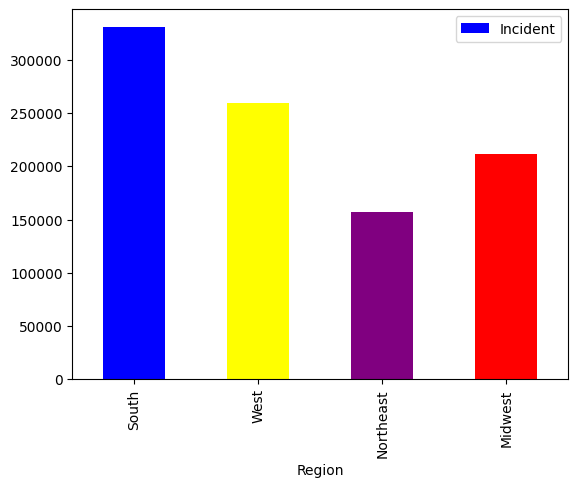

In [48]:
def violent_report ( DF ) :
    ind = 0
    ViRprt = dict()
    Region = DF["Region"] 
    numb = DF["Murder"] + DF["Rape"] + DF["Robbery"] + DF["Assault"]   
    for rgn  in Region :
        if rgn not in ViRprt :
            ViRprt[rgn] = 0
#         if rgn in crm_report : 
        ViRprt[rgn] += numb[ind] 
        ind += 1
    return ViRprt

print( violent_report(df) )

print("#"*90)#######################################################################################################

print("                  incidents                       Region    \n")
for i , j , k in zip( range(0,len(violent_report(df))) , violent_report(df).values() , violent_report(df).keys() ) :
    print( "{0}                   {1}                         {2}".format(i,j,k) )

print("#"*90)#######################################################################################################

def PLOT ( IN_dictionary ) :
    df_specified = pd.DataFrame({"Incident":IN_dictionary.values() , "Region":IN_dictionary.keys() })    
    return df_specified.plot( x="Region",y="Incident",kind="bar",color = ['blue','yellow','purple','red'] )

PLOT( violent_report(df) ) 

print("#"*90)#######################################################################################################

{'South': 2080097, 'West': 1781665, 'Northeast': 760200, 'Midwest': 1226462}
##########################################################################################
                   incidents                        Region    

0                   2080097                         South
1                   1781665                         West
2                   760200                         Northeast
3                   1226462                         Midwest
##########################################################################################
##########################################################################################


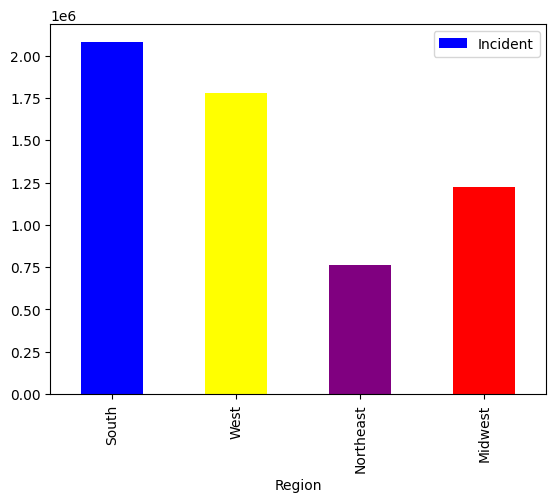

In [49]:
def non_violent_report ( DF ) :
    ind = 0
    nonViRprt = dict()
    Region = DF["Region"] 
    numb = DF['Burglary'] + DF['Theft'] + DF['Vehicle_Theft']   
    for rgn  in Region :
        if rgn not in nonViRprt :
            nonViRprt[rgn] = 0
#         if rgn in crm_report : 
        nonViRprt[rgn] += numb[ind] 
        ind += 1
    return nonViRprt

print( non_violent_report(df) ) 

print("#"*90)#######################################################################################################

print("                   incidents                        Region    \n")
for i , j , k in zip( range(0,len(non_violent_report(df)))  , non_violent_report(df).values() , non_violent_report(df).keys() ) :
    print( "{0}                   {1}                         {2}".format(i,j,k) )


print("#"*90)#######################################################################################################

def PLOT ( IN_dictionary ) :
    df_specified = pd.DataFrame( {"Incident":IN_dictionary.values() , "Region":IN_dictionary.keys()} )    
    return df_specified.plot( x="Region",y="Incident",kind="bar",color = ['blue','yellow','purple','red'] )

PLOT( non_violent_report(df) ) 

print("#"*90)#######################################################################################################


In [50]:
def violent_distance_state_from_mean () :
    list_violent_crimes = df["Murder"] + df["Rape"] + df["Robbery"] + df["Assault"]
    list_state = df["State"]
    total = 0
    state_numb_dict = dict()
    for  state,numb in zip(list_state,list_violent_crimes) :
        total += numb
        if state not in state_numb_dict :
            state_numb_dict[state] = 0
        state_numb_dict[state] += numb
    mean_dict = total / len(state_numb_dict)
    print( "STATE                                  CRIMES                    DISTANCE FROM MEAN \n")
    for i , j  in  zip( state_numb_dict.keys() ,  state_numb_dict.values() ) :
        print( "{0:<20}                   {1}                         {2}".format(i,j,j-mean_dict) )
    


violent_distance_state_from_mean()  

STATE                                  CRIMES                    DISTANCE FROM MEAN 

ALABAMA                                15350                         -3457.0
ALASKA                                 4697                         -14110.0
ARIZONA                                23856                         5049.0
ARKANSAS                               12048                         -6759.0
CALIFORNIA                             145205                         126398.0
COLORADO                               15533                         -3274.0
CONNECTICUT                            7754                         -11053.0
DELAWARE                               2359                         -16448.0
DISTRICT OF COLUMBIA                   7711                         -11096.0
FLORIDA                                50540                         31733.0
GEORGIA                                18496                         -311.0
HAWAII                                 3331                        